In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Data')

In [ ]:
import pandas as pd

In [ ]:
Data=pd.read_csv("Combined data.csv")

In [ ]:
Data.shape

(192446, 2)

In [ ]:
Data = Data.dropna(subset=['text'])

In [ ]:
Data = Data[Data['text'].str.strip() != '']

In [ ]:
Data.shape

(162578, 2)

In [ ]:
!pip install text_hammer

In [ ]:
#import text_hammer as th
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import KeyedVectors
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional
#from tensorflow.compat.v1.keras.layers import CuDNNGRU
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import gensim.downloader as api
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tqdm import tqdm_notebook

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
lists = stopwords.words('english')

In [ ]:
stopwords_list = stopwords.words('english') + [
    'i', 'am', 'is', 'are', 'this', 'that', 'then', 'those', 'have', 'has', 'it', 'can', 'could', 'the',
    'had', 'was', 'were', 'been', 'them', 'what', 'yet', 'though', 'wherein', 'really', 'show', 'then',
    'rather', 'same', 'con', 'call', 'is', 'twenty', 'side', 'go', 'namely', 'every', 'top', 'for', "'m",
    'with', 'either', 'because', 'two', 'well', 'when', 'those', 'under', 'thin', 'amount', 'upon', 'kg',
    'the', "that'll", 'ca', 'even', 'very', 'into', 'by', '‘m', 'keep', 'although', 'done', 'bottom', 'detail',
    'whatever', 'from', 'formerly', 'these', 'enough', 'twelve', 'of', 'too', 'already', 'move', 'something',
    'few', 'nothing', 'they', 'does', 'us', 'next', 'cry', 'but', 'eight', '‘s', 'however', 'four', "'ll",
    'has', 'over', 'someone', 'afterwards', 'myself', 'have', 'would', 'anywhere', 'hereupon', 'using',
    'everything', 'his', 'put', 'many', 'more', 'within', 'which', 'describe', 'thereby', 'nine',
    'elsewhere', 'other', 'he', 'if', 'per', 'your', 's', 'be', 'than', 'now', 'sometime', 'herein', 'why',
    '‘d', 'whereas', 'behind', 'couldnt', 'de', "'re", 'least', 'latter', 'whereafter', 'part', 'after',
    'front', 'interest', "you'd", 'whose', 'fire', 'sincere', 'down', 'to', 'whence', 'ours', "'s", 'all',
    'noone', 'just', 'anyhow', 'ie', 'having', 'her', 'been', 'get', 'former', 'throughout', 'above', '’d',
    'cannot', 'almost', 'do', 'quite', 'seem', 'give', 'first', 'several', 'also', 'seems', 'became', '’m',
    'sixty', 'anyway', '‘re', 'on', "you're", 'onto', 'co', 'third', 'fifty', 'had', 'seemed', '’s',
    'yourselves', 'until', 'an', 'mine', 'across', 'sometimes', 'hereby', 'eleven', 'might', 'mostly',
    'un', 'i', "'d", 'itself', 'most', 'beforehand', 'five', 'beyond', 'herself', "you've", 'unless',
    'regarding', 'there', 'doesn', 'while', 'whoever', "should've", 'whereupon', 'name', 'further', 'o',
    'nobody', 'whereby', 'others', 'between', 'thus', 'any', "you'll", 'found', 'amongst', 'hers',
    'wherever', 'ltd', 'still', 'somehow', 'often', 'km', 'becoming', 'six', 'can', "'ve", 'make', 'hence',
    'around', 'both', 'our', 'along', 'latterly', 'please', 'via', 'whole', 'system', 've', 'd', 'you',
    'themselves', 'here', 'used', 'in', 'forty', 'each', 'find', 'during', 'ain', 'ten', 'him',
    'nevertheless', "she's", 'me', 'them', 'ma', 'meanwhile', 'and', 'y', 'did', 'fifteen', 'serious',
    '’re', "it's", '’ll', 'that', 'alone', 'together', 'where', 'hereafter', 'once', 'himself', 'could',
    'made', 'among', 'whom', 'cant', 'doing', 'again', 'therefore', 'beside', 'hundred', 'three', 'etc',
    'moreover', 'various', 'may', 'since', 'always', 'seeming', 'toward', 'are', 'll', 'everywhere', 'a',
    'empty', 'yours', 'theirs', 'back', 'else', 'own', 'as', 'somewhere', 'bill', '‘ll', 're', 'through',
    'last', 'nowhere', 'what', 'take', 'computer', 'yourself', 'eg', 'perhaps', 'thereupon', 'ourselves',
    'against', 'inc', 'she', 'whether', 'their', 'm', 'such', 'thick', 'anything', '’ve', 'neither',
    'none', 'amoungst', 'one', 'were', 'thru', 'am', 'about', 'without', 'up', 'otherwise', 'except',
    'who', 'due', 'thereafter', 'ever', 'much', 'out', 'how', 'whenever', 'before', 'it', 'some', 'being',
    'mill', 'or', 'its', 'will', 'become', 'besides', 'say', 'therein', 'another', 'see', 'anyone',
    'becomes', 'never', 'towards', 'everyone', 'below', 'full', 'my', 'only', 'fill', 'we', 'should',
    'thence', 'indeed', 'this', 'was', 'less', 'so', 't', 'at', 'must', 'whither', 'off'
]

In [ ]:
def remove_stopwords(text):
    token = word_tokenize(text)
    token_without_stopwords = [word for word in token if word not in stopwords_list]
    text = " ".join(token_without_stopwords)
    return text

In [ ]:
Data['text'] = Data['text'].apply(remove_stopwords)
Data.head()

,text,label
0,Cocaine vs butthole 1v1 & amp ; # x200B ; Who win,not depressed
1,She depressed lately tired I feel ’ fault . Sh...,anxiety
2,hate level nowi good day today time awhile occ...,mental
3,I bipolar disorder hopping jobs endless cycle ...,bipolar disorder
4,"I wan na fuck milf . Is bad ? Like , I know I ...",not depressed


In [ ]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [ ]:
def text_preprocessing(df, col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x: str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    return df

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Data['label'])

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
Data['label'] = onehot_encoded.tolist()

In [ ]:
X = Data['text']
y = np.array(Data['label'].tolist())

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, lower=True)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=200, padding='post')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D

class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [Dense(ff_dim, activation="relu"), Dense(embed_dim)]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

def build_transformer_model(maxlen, vocab_size, embed_dim, num_heads, ff_dim):
    inputs = Input(shape=(maxlen,))
    embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
    x = embedding_layer(inputs)
    transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
    x = transformer_block(x)
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.1)(x)
    x = Dense(20, activation="relu")(x)
    x = Dropout(0.1)(x)
    outputs = Dense(len(label_encoder.classes_), activation="softmax")(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])
    return model

In [ ]:
maxlen = 200  # Maximum length of the input sequences
vocab_size = 10000  # Vocabulary size
embed_dim = 100  # Embedding dimension
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in the feed-forward network

model = build_transformer_model(maxlen, vocab_size, embed_dim, num_heads, ff_dim)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 token_and_position_embeddi  (None, 200, 100)          1020000   
 ng (TokenAndPositionEmbedd                                      
 ing)                                                            
                                                                 
 transformer_block (Transfo  (None, 200, 100)          87632     
 rmerBlock)                                                      
                                                                 
 global_average_pooling1d (  (None, 100)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dropout_2 (Dropout)         (None, 100)               0     

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('./model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history_embedding = model.fit(X_train, y_train,
                              epochs=25, batch_size=128,
                              validation_data=(X_test, y_test),
                              verbose=1, callbacks=[es, mc])

Epoch 1/25
1016/1017 [============================>.] - ETA: 0s - loss: 0.8975 - accuracy: 0.6765
Epoch 1: val_accuracy improved from -inf to 0.77860, saving model to ./model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1017/1017 [==============================] - 300s 293ms/step - loss: 0.8975 - accuracy: 0.6765 - val_loss: 0.6237 - val_accuracy: 0.7786
Epoch 2/25
1016/1017 [============================>.] - ETA: 0s - loss: 0.6047 - accuracy: 0.7884
Epoch 2: val_accuracy improved from 0.77860 to 0.78835, saving model to ./model.h5
1017/1017 [==============================] - 290s 286ms/step - loss: 0.6047 - accuracy: 0.7884 - val_loss: 0.5918 - val_accuracy: 0.7884
Epoch 3/25
1016/1017 [============================>.] - ETA: 0s - loss: 0.5413 - accuracy: 0.8106
Epoch 3: val_accuracy did not improve from 0.78835
1017/1017 [==============================] - 291s 287ms/step - loss: 0.5413 - accuracy: 0.8106 - val_loss: 0.6093 - val_accuracy: 0.7863
Epoch 4/25
1017/1017 [==============================] - ETA: 0s - loss: 0.5033 - accuracy: 0.8224
Epoch 4: val_accuracy did not improve from 0.78835
1017/1017 [==============================] - 287s 283ms/step - loss: 0.5033 - accuracy: 0.8224 - val_loss: 0.6

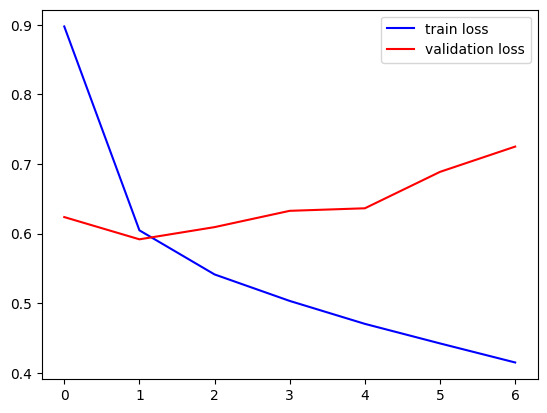

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_embedding.history['loss'], c='b', label='train loss')
plt.plot(history_embedding.history['val_loss'], c='r', label='validation loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
print(classification_report(y_test, y_pred))

1017/1017 [==============================] - 30s 30ms/step
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      5843
           1       0.84      0.77      0.81      7329
           2       0.72      0.61      0.66      4152
           3       0.91      0.90      0.90      2762
           4       0.40      0.32      0.35       285
           5       0.87      0.90      0.88      2854
           6       0.73      0.83      0.78      4420
           7       0.77      0.77      0.77      4336
           8       0.40      0.34      0.37       532
           9       0.00      0.00      0.00         3

    accuracy                           0.78     32516
   macro avg       0.64      0.63      0.63     32516
weighted avg       0.78      0.78      0.78     32516



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Yahan se dusra implementation tha... to apply transformers hi

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import transformers
from transformers import TFAutoModel, AutoTokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
encoded = tokenizer(Data['text'].tolist(), truncation=True, padding=True)
encoded_dataset = tf.data.Dataset.from_tensor_slices((encoded, Data['label'].tolist()))

ValueError: Can't convert Python sequence with mixed types to Tensor.

In [ ]:
encoded_dataset

NameError: name 'encoded_dataset' is not defined

In [ ]:
BATCH_SIZE = 2

def order(inp, label):

    return {
        'input_ids': inp['input_ids'],
        'attention_mask': inp['attention_mask'],
        'token_type_ids': inp['token_type_ids']
    }, label



train_size = int(0.8 * len(encoded_dataset))
val_size = int(0.1 * len(encoded_dataset))

train_dataset = encoded_dataset.take(train_size).map(order)
val_dataset = encoded_dataset.skip(train_size).take(val_size).map(order)
test_dataset = encoded_dataset.skip(train_size + val_size).map(order)


train_dataset = train_dataset.map(order)
val_dataset = val_dataset.map(order)
test_dataset = test_dataset.map(order)


train_dataset = train_dataset.batch(BATCH_SIZE).shuffle(1000)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
text, label = next(iter(train_dataset))
print(text, '\n\n', label)

In [ ]:
bert_model = TFAutoModel.from_pretrained("bert-base-uncased")

In [ ]:
class BERTForClassification(tf.keras.Model):

    def __init__(self, bert_model):
        super().__init__()
        self.bert = bert_model
        self.fc = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.bert(inputs)[1]
        return self.fc(x)

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'bert_model': self.bert,
            'num_classes': self.fc.units,
        })
        return config

In [ ]:
model = BERTForClassification(bert_model)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=val_dataset
)

In [ ]:
model.evaluate(test_dataset)

In [ ]:
y_true = []
for batch in test_dataset:
    x, y = batch
    y_true.extend(y.numpy())

y_pred_prob = model.predict(test_dataset)
y_pred = np.round(y_pred_prob).astype(int)

cm = confusion_matrix(y_true, y_pred)
print(cm)

In [ ]:
test_m = ["Today I felt good in the morning, everything was good, but in the evening, it rained, and as a result, I got stuck in the traffic; my life sucks",
           "Today, I felt good in the morning; everything was good, but in the evening, it rained, and as a result, I got stuck in traffic. My life sucks; I should end it; I should kill myself."]

inputs = tokenizer(test_m ,padding=True, truncation=True,
                  return_tensors='tf')
model.call(inputs)